<a href="https://colab.research.google.com/github/avi-007/Deep-Learning-Work/blob/master/IMDB_Sentiment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 3s 0us/step


In [0]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [0]:
train_labels[0]

1

In [0]:
max([max(sequence) for sequence in train_data])

9999

In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

1646592/1641221 [==============================] - 1s 1us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [0]:
import numpy as np
def vectorize_sequneces(sequences,dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1.
  return results

x_train=vectorize_sequneces(train_data)
x_test=vectorize_sequneces(test_data)

In [0]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [0]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [0]:
y_train[0]

1.0

In [0]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [0]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 5s 350us/step - loss: 0.5349 - acc: 0.7849 - val_loss: 0.4153 - val_acc: 0.8592
Epoch 2/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.3288 - acc: 0.8989 - val_loss: 0.3163 - val_acc: 0.8884
Epoch 3/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.2350 - acc: 0.9257 - val_loss: 0.2946 - val_acc: 0.8849
Epoch 4/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.1838 - acc: 0.9419 - val_loss: 0.2740 - val_acc: 0.8896
Epoch 5/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.1479 - acc: 0.9539 - val_loss: 0.3374 - val_acc: 0.8660
Epoch 6/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.1233 - acc: 0.9617 - val_loss: 0.2921 - val_acc: 0.8836
Epoch 7/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.1010 - acc: 0.9709 - val_loss: 0.3102 

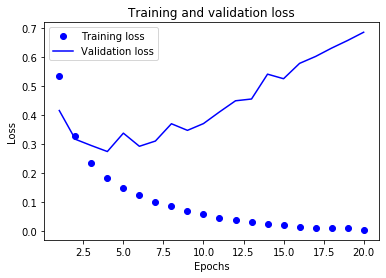

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
plt.clf()
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


NameError: ignored

<Figure size 432x288 with 0 Axes>

In [0]:
results=model.evaluate(x_test,y_test)
results

25000/25000 [==============================] - 2s 71us/step


[0.7590980034041405, 0.84792]

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 55us/step - loss: 0.4765 - acc: 0.8214
Epoch 2/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.2772 - acc: 0.9065
Epoch 3/4
25000/25000 [==============================] - 1s 47us/step - loss: 0.2113 - acc: 0.9248
Epoch 4/4
25000/25000 [==============================] - 2s 76us/step


In [0]:
results

[0.285170364742279, 0.88716]

In [0]:
model.predict(x_test)

array([[0.22373429],
       [0.9997164 ],
       [0.90503865],
       ...,
       [0.11339369],
       [0.07281548],
       [0.5852004 ]], dtype=float32)